In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.cross_decomposition import PLSRegression
from IPython.display import clear_output
import imageio
import os
import matplotlib
import time 
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import warnings
import scipy
from sklearn.decomposition import PCA

In [91]:
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20

In [69]:
def prepare_time_series(_dir, centred = True):
    data = pd.read_csv(_dir, delimiter =',', decimal='.')
    
    # frequency = len(data)/(data['time'].values[-1]-data['time'].values[0])
    
    # assert 490 < frequency < 510, f'Bad frequency {frequency}'

    _x = ( (data['x'].values)**2 + (data['y'].values)**2 + (data['z'].values)**2)**.5
    
    if centred:
        _m = np.mean(_x)
        _x = (_x-_m)
        
    # _t = (data['time'].values).astype(float).reshape([-1,])

    # _t = np.linspace(0,_t[-1]-_t[0],len(_x))
        
    return _x #,_t


def HankelMatrix(X, L):  
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

def HankelMatrix_reverse(X):
    return np.hstack((X[:,0], X[-1][1:]))

In [21]:
x_acc = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Accelerometer.csv')

x_gyr = prepare_time_series('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/Kurdyukova-BS-Thesis/master/code/data/Gyroscope.csv')

x_acc = x_acc[50:5050]
x_gyr = x_gyr[50:5050]

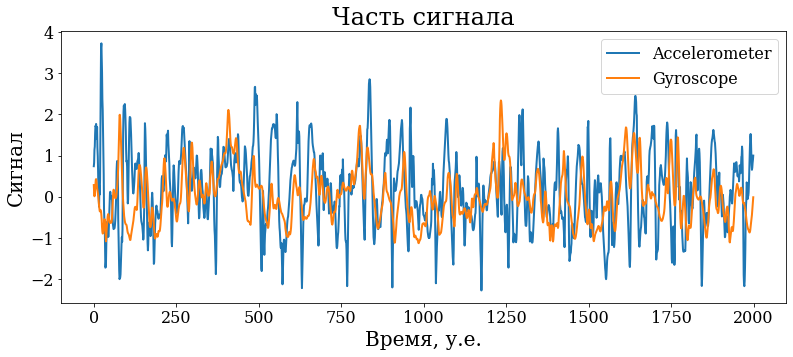

In [103]:
plt.figure(figsize=(13,5))
plt.title("Часть сигнала")
plt.plot(np.arange(len(x_acc[:2000])), x_acc[:2000], label = 'Accelerometer')
plt.plot(np.arange(len(x_gyr[:2000])), x_gyr[:2000], label = 'Gyroscope')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend()
plt.savefig('signal.png')
plt.show()


In [43]:
X_train = HankelMatrix(x_acc[:3000], 1000)
y_train_1 = HankelMatrix(x_gyr[:3000], 1000)
y_train_2 = HankelMatrix(x_gyr[3000:], 1000)

In [44]:
pls2 = PLSRegression(n_components=30, max_iter=20000).fit(X_train, y_train_1)

In [73]:
Y_pred_1 = pls2.predict(X_train)
y_pred_1 = HankelMatrix_reverse(Y_pred_1)

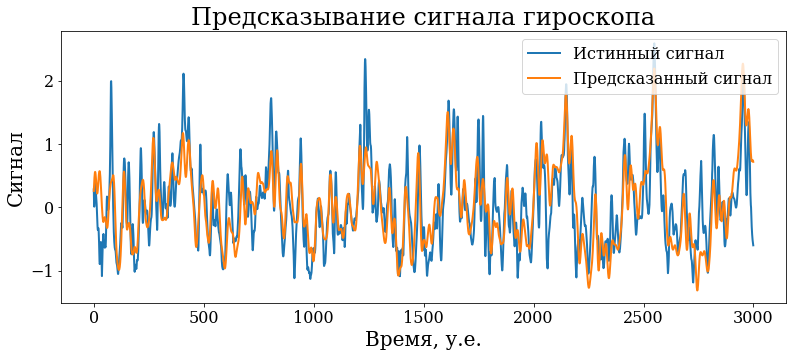

In [102]:
plt.figure(figsize=(13,5))
plt.title("Предсказывание сигнала гироскопа")
plt.plot(np.arange(len(x_gyr[:3000])), x_gyr[:3000], label = 'Истинный сигнал')
plt.plot(np.arange(len(y_pred_1)), y_pred_1, label = 'Предсказанный сигнал')
plt.xlabel("Время, у.е.")
plt.ylabel("Сигнал")
plt.legend(loc='upper right')
plt.savefig('gyr_pred.png')
plt.show()
